# Introduction to Scikit-Learn Regression and Classification

## Step 1 - Generating the Dataset

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 7)

np.random.seed(0)

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.DataFrame(index=pd.date_range('2000', '2020'))
df['BookPressure'] = np.random.randn(len(df)) * 2
df['TradePressure'] = np.random.randn(len(df)) * 100
df['RelativeValue'] = np.random.randn(len(df)) * 50
df['Microstructure'] = np.random.randn(len(df)) * 10

print(df)

true_coefficients = np.random.randint(low=-100, high=101, size=4) / 10

df['PriceChange'] = ((df['BookPressure'] * true_coefficients[0])
+ (df['TradePressure'] * true_coefficients[1])
+ (df['RelativeValue'] * true_coefficients[2])
+ (df['Microstructure'] * true_coefficients[3])
+ (np.random.randn(len(df)) * 200))

df['Price'] = df['PriceChange'].cumsum(0) + 100000


            BookPressure  TradePressure  RelativeValue  Microstructure
2000-01-01     -1.508473      74.030248      46.777830        2.000336
2000-01-02      2.823710      48.839018      48.521241       -5.471681
2000-01-03     -3.440886      23.212744       7.776729        8.901866
2000-01-04     -0.427908     -64.210343    -107.241971       23.993479
2000-01-05      4.380149     -17.615011      -3.602010        2.893707
...                  ...            ...            ...             ...
2019-12-28      1.184275     -23.511085       7.672830       10.068056
2019-12-29      0.754768     -19.097401     -41.507210       -6.337744
2019-12-30      2.308421     248.076912       0.529547       -2.793997
2019-12-31     -0.009263     -35.766570      47.480368        0.566979
2020-01-01     -1.623250      -3.305093     -80.153119        0.446940

[7306 rows x 4 columns]
[-4.2 -9.7  4.2  5.3]


In [5]:
true_coefficients

array([-4.2, -9.7,  4.2,  5.3])

In [6]:
df

,BookPressure,TradePressure,RelativeValue,Microstructure,PriceChange,Price
2000-01-01,-1.508473,74.030248,46.777830,2.000336,-530.852277,99469.147723
2000-01-02,2.823710,48.839018,48.521241,-5.471681,-138.987452,99330.160271
2000-01-03,-3.440886,23.212744,7.776729,8.901866,107.416942,99437.577213
2000-01-04,-0.427908,-64.210343,-107.241971,23.993479,255.225603,99692.802816
2000-01-05,4.380149,-17.615011,-3.602010,2.893707,54.349885,99747.152700
...,...,...,...,...,...,...
2019-12-28,1.184275,-23.511085,7.672830,10.068056,213.302513,68756.958420
2019-12-29,0.754768,-19.097401,-41.507210,-6.337744,-45.381809,68711.576610
2019-12-30,2.308421,248.076912,0.529547,-2.793997,-2309.536549,66402.040062
2019-12-31,-0.009263,-35.766570,47.480368,0.566979,681.752889,67083.792951


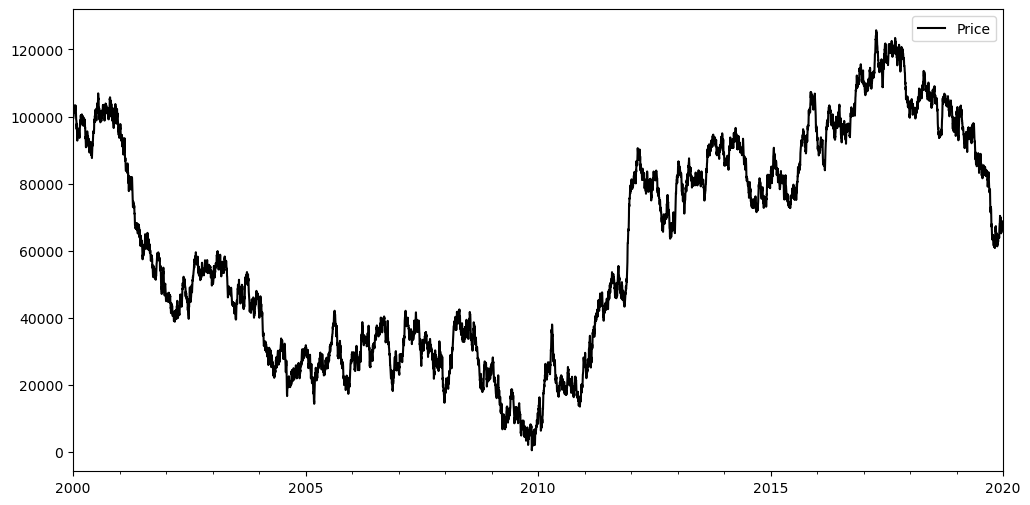

In [12]:
df['Price'].plot(figsize=(12, 6), color='black', legend='Price')
plt.show()

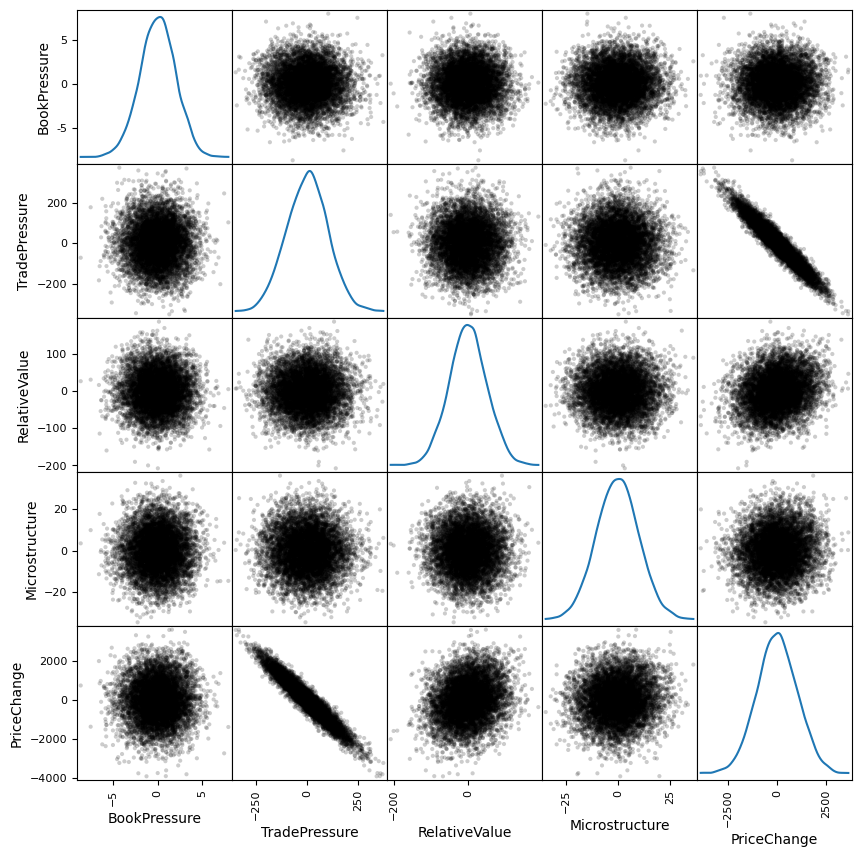

In [13]:
pd.plotting.scatter_matrix(df.drop('Price', axis=1), color='black', alpha=0.2, grid=True, diagonal='kde', figsize=(10, 10))
plt.show()

## Step 2 - Running RidgeCV Regression

In [14]:
features = df[['BookPressure', 'TradePressure', 'RelativeValue', 'Microstructure']]
target = df['PriceChange']

In [17]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV()
ridge.fit(features, target)

RidgeCV()

In [18]:
true_coefficients, ridge.coef_

(array([-4.2, -9.7,  4.2,  5.3]),
 array([-4.86344198, -9.68939482,  4.18801968,  5.09092548]))

In [19]:
ridge.score(features, target)

0.9622485242071184

In [20]:
df['PredPrice'] = ridge.predict(features).cumsum(0) + 100000; df

,BookPressure,TradePressure,RelativeValue,Microstructure,PriceChange,Price,PredPrice
2000-01-01,-1.508473,74.030248,46.777830,2.000336,-530.852277,99469.147723,99495.969396
2000-01-02,2.823710,48.839018,48.521241,-5.471681,-138.987452,99330.160271,99184.219203
2000-01-03,-3.440886,23.212744,7.776729,8.901866,107.416942,99437.577213,99053.775442
2000-01-04,-0.427908,-64.210343,-107.241971,23.993479,255.225603,99692.802816,99350.884746
2000-01-05,4.380149,-17.615011,-3.602010,2.893707,54.349885,99747.152700,99499.758592
...,...,...,...,...,...,...,...
2019-12-28,1.184275,-23.511085,7.672830,10.068056,213.302513,68756.958420,68957.186416
2019-12-29,0.754768,-19.097401,-41.507210,-6.337744,-45.381809,68711.576610,68932.311202
2019-12-30,2.308421,248.076912,0.529547,-2.793997,-2309.536549,66402.040062,66505.214208
2019-12-31,-0.009263,-35.766570,47.480368,0.566979,681.752889,67083.792951,67053.402133


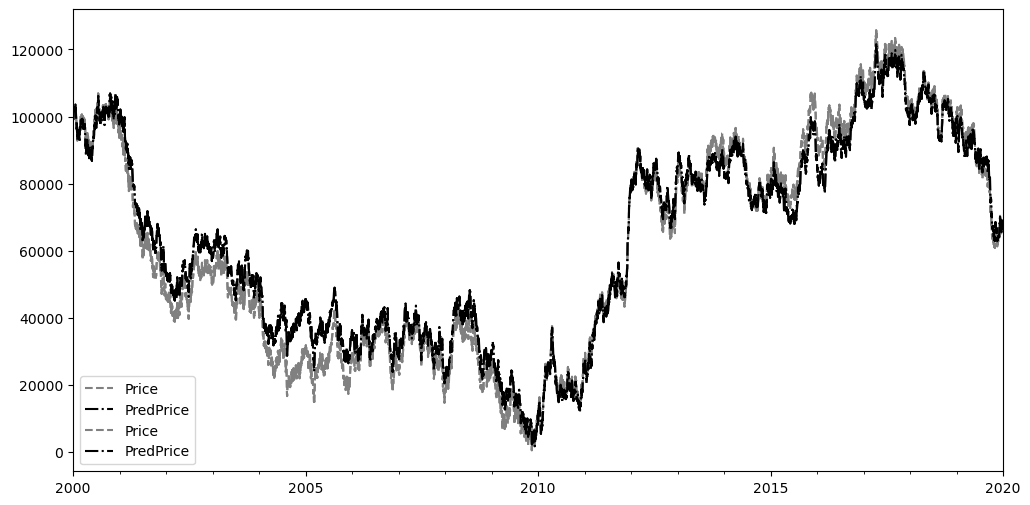

In [22]:
df['Price'].plot(figsize=(12, 6), color='gray', linestyle='--', legend='Price')
df['PredPrice'].plot(figsize=(12, 6), color='black', linestyle='-.', legend='PredPrice')
plt.show()

In [23]:
df['Price'].loc['2010-01-01':'2010-03-31'].plot(figsize=(12, 6), color='darkgray', linestyle='-', legend='Price')
df['PredPrice'].loc['2010-01-01':'2010-03-31'].plot(figsize=(12, 6), color='black', linestyle='-.', legend='PredPrice')

<Axes: >

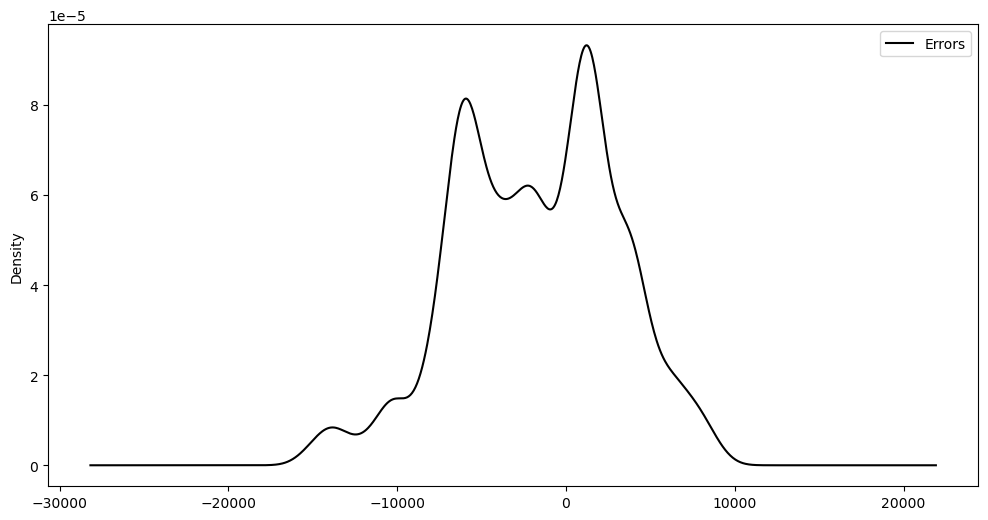

In [26]:
df['Errors'] = df['Price'] - df['PredPrice']
df['Errors'].plot(figsize=(12, 6), kind='kde', color='black', legend='Errors')
plt.show()

### Step 3 - Running Classification on the Dataset

In [27]:
target_discrete = pd.cut(target, bins=5, labels=[-2, -1, 0, 1, 2]).astype(int); target_discrete

2000-01-01    0
2000-01-02    0
2000-01-03    0
2000-01-04    0
2000-01-05    0
             ..
2019-12-28    0
2019-12-29    0
2019-12-30   -1
2019-12-31    1
2020-01-01    0
Freq: D, Name: PriceChange, Length: 7306, dtype: int64

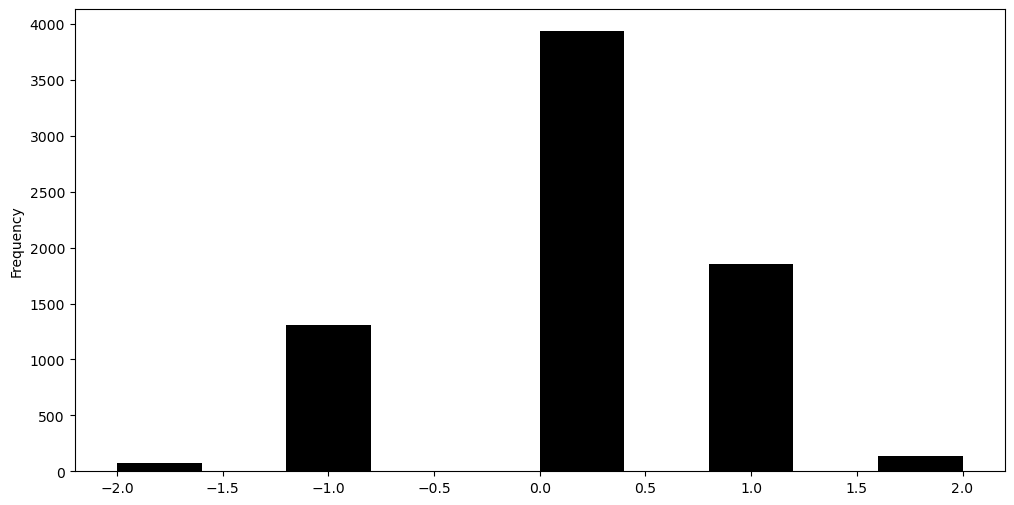

In [29]:
target_discrete.plot(figsize=(12, 6), kind='hist', color='black');plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5)
rf.fit(features, target_discrete)

RandomForestClassifier(max_depth=5)

In [31]:
rf.score(features, target_discrete)

0.8976183958390364

In [32]:
df['DiscretePriceChange'] = target_discrete
df['PredDiscretePriceChange'] = rf.predict(features)
df

,BookPressure,TradePressure,RelativeValue,...,Errors,DiscretePriceChange,PredDiscretePriceChange
2000-01-01,-1.508473,74.030248,46.777830,...,-2.682167e+01,0,0
2000-01-02,2.823710,48.839018,48.521241,...,1.459411e+02,0,0
2000-01-03,-3.440886,23.212744,7.776729,...,3.838018e+02,0,0
2000-01-04,-0.427908,-64.210343,-107.241971,...,3.419181e+02,0,0
2000-01-05,4.380149,-17.615011,-3.602010,...,2.473941e+02,0,0
...,...,...,...,...,...,...,...
2019-12-28,1.184275,-23.511085,7.672830,...,-2.002280e+02,0,0
2019-12-29,0.754768,-19.097401,-41.507210,...,-2.207346e+02,0,0
2019-12-30,2.308421,248.076912,0.529547,...,-1.031741e+02,-1,-1
2019-12-31,-0.009263,-35.766570,47.480368,...,3.039082e+01,1,0


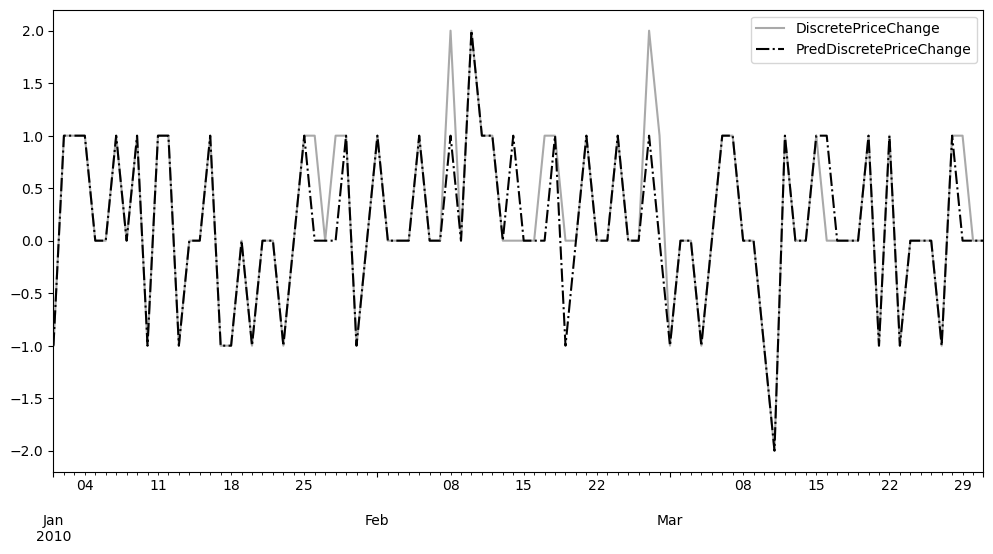

In [33]:
df['DiscretePriceChange'].loc['2010-01-01':'2010-03-31'].plot(figsize=(12, 6), color='darkgray', linestyle='-', legend='Price')
df['PredDiscretePriceChange'].loc['2010-01-01':'2010-03-31'].plot(figsize=(12, 6), color='black', linestyle='-.', legend='PredPrice')

plt.show()

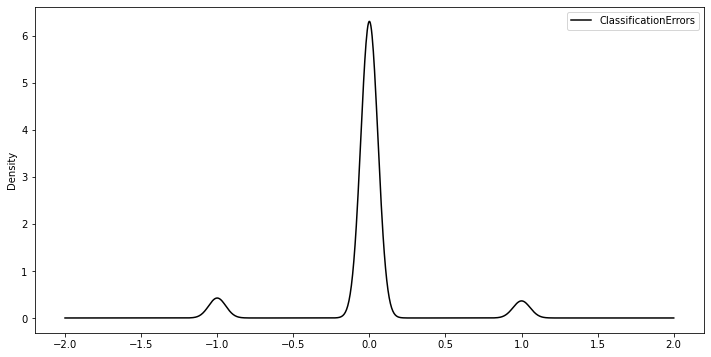

In [21]:
df['ClassificationErrors'] = df['DiscretePriceChange'] - df['PredDiscretePriceChange']
df['ClassificationErrors'].plot(figsize=(12, 6), kind='kde', color='black', legend='ClassificationErrors')